<a href="https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/Synonyms_Grounding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

In [28]:
example_date = "dec 25th"
from dateutil import parser
datetime = parser.parse(example_date)
datetime

datetime.datetime(2019, 12, 25, 0, 0)

In [31]:
stndrd,th = ["st","nd","rd"], ["th"] 

import pandas as pd 
dt = pd.to_datetime(datetime)
date_time = {
  "phrase":example_date,
  "date": f"{dt.day}/{dt.month}/{dt.year}",
  "time": f"{dt.hour}:{dt.minute}:{dt.second}",
  "month":("January","February","March","April","May","June","July","August","September","October","November","December")[dt.month -1],
  "day":("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday")[dt.dayofweek],
  "day of year":dt.dayofyear,
  "suffix":f"{dt.day}{(stndrd + th*17 + stndrd + th * 7 + stndrd)[dt.month - 1]}",
  "is month end":dt.is_month_end,
  "is month start":dt.is_month_start,
  "is quarter end":dt.is_quarter_end,
  "is quarter start":dt.is_quarter_start,
  "is year start":dt.is_year_start,
  "is year end":dt.is_year_end,
  "is weekend":dt.dayofweek in (6,7),
}

date_time

{'date': '25/12/2019',
 'day': 'Wednesday',
 'day of year': 359,
 'is month end': False,
 'is month start': False,
 'is quarter end': False,
 'is quarter start': False,
 'is weekend': False,
 'is year end': False,
 'is year start': False,
 'month': 'December',
 'phrase': '25th December',
 'suffix': '25th',
 'time': '0:0:0'}

# Google Correlate

In [30]:
example_date = f"{date_time['suffix']} {date_time['month']}"
example_date

'25th December'

In [32]:
from random import choice

time_frame = choice(("weekly","monthly"))
country_code = choice(("uk","us"))

import requests
gcorrelate_url = f"https://www.google.com/trends/correlate/search?e={example_date}&t={time_frame}&p={country_code}"
result = requests.get(gcorrelate_url)

from bs4 import BeautifulSoup as bs
soup = bs(result.text, "html.parser") 

correlated = set()
for entities in soup.find_all("li",attrs={"class":"result"}):
  for entity in entities:
    entity = entity.text.strip()
    for ent in entity.split('\n'):
      try:
        float(ent)
      except:
        correlated.add(ent)

print(correlated)

{'how to cook turkey', 'buche de noel', 'chocolate yule log', 'cooking ham', 'cooking a turkey crown', 'sage stuffing', 'cooking times for turkey', 'why is boxing day called', 'christmas swim', 'turkey breast joint', '14 december', 'carols from kings', 'morrisons christmas opening', 'december will be magic again', 'christmas mass', 'crosby david', 'sprouts chestnuts', 'december 25', 'brandy butter', 'sprout recipe', 'post office christmas', 'trains boxing day', 'christmas sale', 'tesco xmas opening hours', 'baked ham', 'nut roast recipe', 'ham recipes', 'last minute new years eve', 'turkey soup', 'sale christmas', 'turkey stock', 'post office christmas opening', 'coronation street christmas', 'colly birds', '25 december', 'stuff a turkey', 'bbc sports personality', 'xmas opening hours', 'why is boxing day', 'tv guide christmas', 'dec 25', 'christmas bus timetable', 'how to cook a turkey', 'christmas tree light', 'bing crosby david bowie', 'apricot stuffing', 'christmas lottery', '29 de

(-0.5, 799.5, 799.5, -0.5)

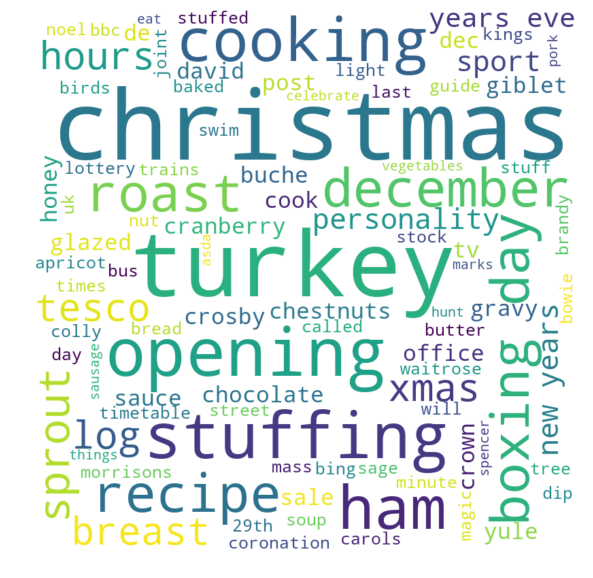

In [33]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(' '.join(correlated))

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# WordNet (NLTK)

In [3]:
import nltk
nltk.download('wordnet')

from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [0]:
def synonyms(word):
  synonyms = set()
  for synset in wn.synsets('_'.join(word.lower().split())):
      synonyms |= set(synset.lemma_names())
      for related_synset in synset.hypernyms() \
                           + synset.hyponyms() \
                           + synset.part_meronyms() \
                           + synset.substance_meronyms() \
                           + synset.member_meronyms() \
                           + synset.part_holonyms() \
                           + synset.substance_holonyms() \
                           + synset.member_holonyms() \
                           + synset.topic_domains() \
                           + synset.region_domains() \
                           + synset.usage_domains() \
                           + synset.entailments() \
                           + synset.causes() \
                           + synset.also_sees() \
                           + synset.verb_groups() \
                           + synset.similar_tos():
        synonyms |= set(related_synset.lemma_names())
  return synonyms

In [20]:
synonyms('robotics')

{'AI', 'animatronics', 'artificial_intelligence', 'robotics', 'telerobotics'}

# DBPedia

In [22]:
import requests

example_name = '_'.join([word[0].upper() + word[1:] for word in input().split()])

dbpedia_json = f"http://dbpedia.org/data/{example_name}.json"
data = requests.get(dbpedia_json).json()

related_entities = {}
for entity,relations in data.items():
  entity = entity.split('/')[-1]
  for relation in relations:
    if "ontology" in relation:
      relation = relation.split('/ontology/')[-1]
      if entity != example_name:
        if relation in related_entities:
          related_entities[relation].add(entity)
        else:
          related_entities[relation] = {entity}
person = data[dbpedia_json.replace('/data/','/resource/')[:-5]]
for relation,entities in person.items():
  relation = relation.split('/')[-1]
  if relation.isalpha():
    for entity in entities:
      entity = str(entity["value"]).split('/')[-1].split('Category:')[-1]
      if relation in related_entities:
        related_entities[relation].add(entity)
      else:
        related_entities[relation] = {entity}
related_entities

albert einstein


{'abstract': {'12 in Österreich-Ungarn auch Bürger Österreichs. Von 1914 bis 1932 lebte Einstein in Berlin und war als Bürger Preußens erneut Staatsangehöriger im Deutschen Reich. Mit der „Machtergreifung“ Hitlers gab er 1933 den deutschen Pass endgültig ab. Zusätzlich zu seinem seit 1901 geltenden Schweizer Bürgerrecht erwarb er 1940 noch die amerikanische Staatsbürgerschaft.',
  '; German: [ˈalbɛɐ̯t ˈaɪnʃtaɪn] ; 14 March 1879 – 18 April 1955) was a German-born theoretical physicist. He developed the general theory of relativity, one of the two pillars of modern physics (alongside quantum mechanics). Einstein\'s work is also known for its influence on the philosophy of science. Einstein is best known in popular culture for his mass–energy equivalence formula E = mc2 (which has been dubbed "the world\'s most famous equation"). He received the 1921 Nobel Prize in Physics for his "services to theoretical physics", in particular his discovery of the law of the photoelectric effect, a pivo

In [25]:
from random import choice
relation = choice(list(related_entities.keys()))
print(f"{example_name.replace('_',' ')} - {relation} - {[entity.replace('_',' ') for entity in related_entities[relation]]}")

Albert Einstein - deathPlace - ['Princeton, New Jersey']


# Wikipedia

In [26]:
import requests

wikipedia_url = "https://en.wikipedia.org/wiki/" + example_name
result = requests.get(wikipedia_url)

from bs4 import BeautifulSoup as bs

soup = bs(result.text, "html.parser")
related_entities = set()
for a in soup.find_all("a"):
    href = a.get("href")
    if href is not None and "/wiki/" in href and ":" not in href and "Main_Page" not in href:
      entity = a.text.strip()
      if entity not in ("read","article") and len(entity) > 0:
        related_entities.add(entity)

print(related_entities)

{'The New York Times', 'Albert Einstein Award', 'TheGuardian.com', 'second quantization', 'Prussian Academy of Sciences', 'Arthur Eddington', 'Weiss', 'Argovian', 'Why Socialism?', 'Phantom energy', 'Scientific American', 'Bernhard Caesar Einstein', 'Imre Lakatos', 'Geography', 'Shape of the universe', 'Einstein–Infeld–Hoffmann equations', 'Giaever', 'accepted interpretation', 'Statistical mechanics', 'Stark', 'Charpak', 'Caltech', 'rest energy', "Hubble's law", 'Einstein–Cartan theory', 'light from another star should be bent', 'The Independent', 'ultra-cooling', 'Marconi', 'German Physical Society', 'Hubble', 'Fallibilism', 'entangled quantum states', '"Lieserl" Einstein', 'Annalen der Physik', 'W. E. B. Du Bois', 'Special relativity', 'Turkey', 'Einstein–Szilárd letter', 'torsion', 'theory of everything', 'Wigner', 'Einstein field equations', 'Osheroff', 'Gravitational wave background (GWB)', 'Wieman', 'A priori and a posteriori', 'Rayleigh', 'PMC', 'Pieter Zeeman', 'Braun', '"Liese

(-0.5, 799.5, 799.5, -0.5)

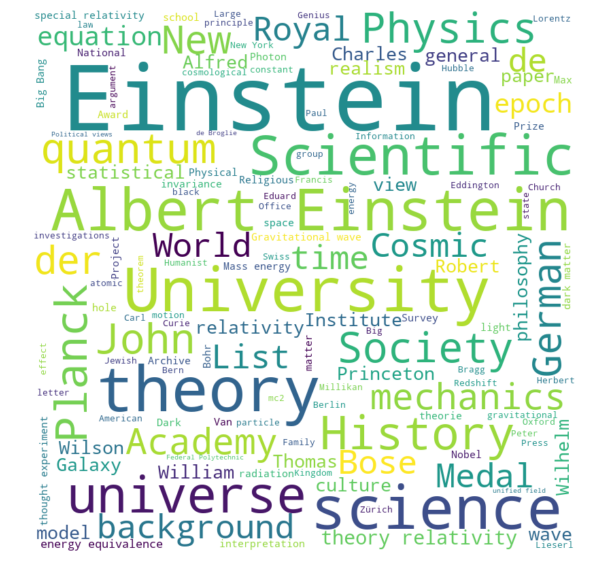

In [27]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 10).generate(' '.join(related_entities))

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")